In [1]:
from sklearn.linear_model import LinearRegression
import os
import pandas as pd
import numpy as np

folder = "data"
file_path = os.path.join(folder, "prepared_data.csv")
df = pd.read_csv(file_path)

In [ ]:
for c in df.columns:
    print(c)

ID_OKRSKY
Rebelové
MZH
JaSaN
VÝZVA
SMSka
SPD
ČSSD
PŘÍSAHA
Levice
ČR1
SPOLU
Švýcarská dem.
Nevolte Urza.cz
HOP Hydra
Generace
Piráti
Koruna Česká
Volt
PB
AUTO
BPS
ANO
STAN
Kruh
Stačilo!
Voluntia
OBEC
OKRES
ODEVZ_OBAL
PL_HL_CELK
ID_OKRSKY_%
Rebelové_%
MZH_%
JaSaN_%
VÝZVA_%
SMSka_%
SPD_%
ČSSD_%
PŘÍSAHA_%
Levice_%
ČR1_%
SPOLU_%
Švýcarská dem._%
Nevolte Urza.cz_%
HOP Hydra_%
Generace_%
Piráti_%
Koruna Česká_%
Volt_%
PB_%
AUTO_%
BPS_%
ANO_%
STAN_%
Kruh_%
Stačilo!_%
Voluntia_%
NEPL_HLASY_%
Obec_KOD
Obec
Pop
Obyvatelstvo celkem_%
Obyvatelstvo celkem_M
Obyvatelstvo celkem_Z
0-4_TOT
0-4_%
0-4_M
0-4_Z
5-9_TOT
5-9_%
5-9_M
5-9_Z
10-14_TOT
10-14_%
10-14_M
10-14_Z
15-17_TOT
15-17_%
15-17_M
15-17_Z
18-19_TOT
18-19_%
18-19_M
18-19_Z
20-24_TOT
20-24_%
20-24_M
20-24_Z
25-29_TOT
25-29_%
25-29_M
25-29_Z
30-34_TOT
30-34_%
30-34_M
30-34_Z
35-39_TOT
35-39_%
35-39_M
35-39_Z
40-44_TOT
40-44_%
40-44_M
40-44_Z
45-49_TOT
45-49_%
45-49_M
45-49_Z
50-54_TOT
50-54_%
50-54_M
50-54_Z
55-59_TOT
55-59_%
55-59_M
55-59_Z
60

In [ ]:
import statsmodels.api as sm

age_groups = ["18-19_TOT"] + [f"{i}-{i+4}_TOT" for i in range(20, 80, 5)]

['18-19_TOT', '20-24_TOT', '25-29_TOT', '30-34_TOT', '35-39_TOT', '40-44_TOT', '45-49_TOT', '50-54_TOT', '55-59_TOT', '60-64_TOT', '65-69_TOT', '70-74_TOT', '75-79_TOT']


In [20]:
X = pd.DataFrame({**{age_group: df[age_group] for age_group in age_groups}})
y = df['Piráti_%']
w = df['Pop']

In [9]:
from ISLP.models import summarize

In [11]:
X.head()

,intercept,18-19_TOT,20-24_TOT,25-29_TOT,30-34_TOT,35-39_TOT,40-44_TOT,45-49_TOT,50-54_TOT,55-59_TOT,60-64_TOT,65-69_TOT,70-74_TOT,75-79_TOT
0,1.0,27,77,76,118,124,130,156,132,139,128,130,115,78
1,1.0,22,49,48,61,74,103,109,75,64,89,98,83,48
2,1.0,33,67,91,97,121,147,132,110,92,103,139,87,60
3,1.0,55,90,100,131,104,137,183,159,138,124,123,121,78
4,1.0,36,83,82,89,98,129,140,125,143,118,105,99,80


               coef   std_err          t             p signif    ci_low  \
18-19_TOT  0.006338  0.004022   1.575753  1.151336e-01        -0.001547   
20-24_TOT -0.002902  0.001669  -1.738600  8.215458e-02      . -0.006174   
25-29_TOT  0.002493  0.001724   1.445477  1.483743e-01        -0.000888   
30-34_TOT -0.017513  0.001631 -10.737882  1.154849e-26    *** -0.020710   
35-39_TOT -0.003453  0.001666  -2.072933  3.821953e-02      * -0.006719   
40-44_TOT  0.021243  0.001589  13.365518  3.424500e-40    ***  0.018127   
45-49_TOT -0.003461  0.001499  -2.309868  2.092799e-02      * -0.006399   
50-54_TOT  0.014335  0.001434   9.994312  2.417185e-23    ***  0.011524   
55-59_TOT -0.014905  0.001409 -10.579976  6.118094e-26    *** -0.017667   
60-64_TOT  0.010640  0.001731   6.147139  8.377383e-10    ***  0.007247   
65-69_TOT  0.002305  0.001599   1.441546  1.494807e-01        -0.000830   
70-74_TOT -0.009079  0.001222  -7.428318  1.247293e-13    *** -0.011475   
75-79_TOT -0.002159  0.00

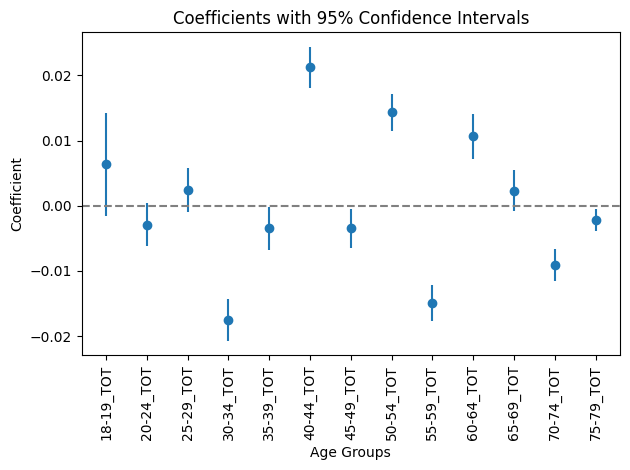

In [21]:
model = sm.WLS(y, X, weights = w)
results = model.fit()
summarize(results)

params = results.params
se     = results.bse
tvals  = results.tvalues
pvals  = results.pvalues
ci     = results.conf_int()
ci.columns = ['ci_low', 'ci_high']

stars = pd.cut(
    pvals,
    bins=[-1, 0.001, 0.01, 0.05, 0.1, 1],
    labels=['***', '**', '*', '.', '']
)

tbl = pd.concat([params, se, tvals, pvals, stars.rename('signif'), ci], axis=1)
tbl.columns = ['coef', 'std_err', 't', 'p', 'signif', 'ci_low', 'ci_high']

tbl['coef(se)★'] = (
    tbl['coef'].round(3).astype(str) + ' (' +
    tbl['std_err'].round(3).astype(str) + ')' +
    tbl['signif'].astype(str)
)

print(tbl)

# plot coefficients and confidence intervals
import matplotlib.pyplot as plt
plt.errorbar(tbl.index, tbl['coef'], yerr=(tbl['ci_high'] - tbl['ci_low'])/2, fmt='o')
plt.xticks(rotation=90)
plt.axhline(0, color='grey', linestyle='--')
plt.title('Coefficients with 95% Confidence Intervals')
plt.xlabel('Age Groups')
plt.ylabel('Coefficient')
plt.tight_layout()
plt.show()